In [1]:
# butuh install cvxopt sebelum mencoba program ini:
# conda install -c conda-forge cvxopt

import matplotlib.pyplot as plt
import numpy as np
from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
from qiskit.circuit.library import ZZFeatureMap

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

In [2]:
from qiskit import IBMQ
provider = IBMQ.load_account()

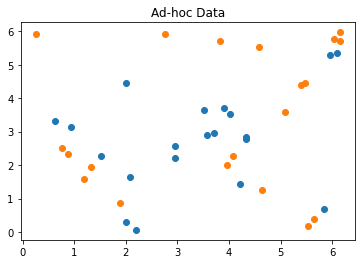

{'A': 0, 'B': 1}


In [3]:
# Note: You can easily switch to a different dataset, 
# such as the Breast Cancer dataset, by replacing 'ad_hoc_data' to 'Breast_cancer' below.

feature_dim=2 # we support feature_dim 2 or 3
sample_Total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20, 
    test_size=10, 
    n=feature_dim, 
    gap=0.3, 
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_Total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)

In [4]:
seed = 10598

feature_map = ZZFeatureMap(feature_dimension=feature_dim, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input, datapoints[0])
# Parameter feature_map = Feature map module, used to transform data
# Parameter training_dataset = Training dataset.
# Parameter test_dataset = Testing dataset.
# Parameter datapoints = Prediction dataset.

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)
# QSVM.run([quantum_instance]) = Execute the algorithm with selected backend.

print("testing success ratio: {}".format(result['testing_accuracy']))
print("preduction of datapoints:")
print("ground truth: {}".format(map_label_to_class_name(datapoints[1], qsvm.label_to_class)))
print("prediction:   {}".format(result['predicted_classes']))

2020-05-22 19:53:56,320:qiskit.aqua.quantum_instance:INFO: 
Qiskit Terra version: 0.14.1
Backend: 'qasm_simulator (BasicAer)', with following setting:
{'basis_gates': ['u1', 'u2', 'u3', 'cx', 'id', 'unitary'], 'coupling_map': None}
{'pass_manager': None, 'initial_layout': None, 'seed_transpiler': 10598, 'optimization_level': None}
RunConfig(max_credits=10, seed_simulator=10598, shots=1024)
{'timeout': None}
{}
{}
Measurement mitigation: None
2020-05-22 19:54:01,131:qiskit.aqua.algorithms.classifiers.qsvm.qsvm:DEBUG: Calculating overlap:
|██████████████████████████████████████████████████| 780/780 [00:00:00:00]
2020-05-22 19:54:01,569:qiskit.aqua.utils.qp_solver:DEBUG: Solving QP problem is completed.
2020-05-22 19:54:02,961:qiskit.aqua.algorithms.classifiers.qsvm.qsvm:DEBUG: Calculating overlap:
|██████████████████████████████████████████████████| 240/240 [00:00:00:00]
2020-05-22 19:54:03,087:qiskit.aqua.algorithms.classifiers.qsvm._qsvm_binary:DEBUG: Classification success for this se

testing success ratio: 0.9
preduction of datapoints:
ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
prediction:   ['A', 'B', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


kernel matrix during the training:


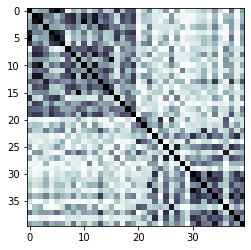

In [5]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

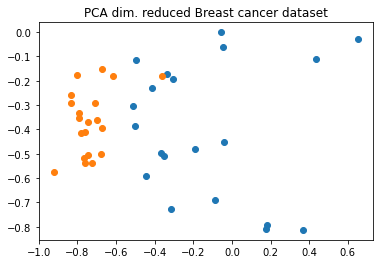

In [6]:
# The breast cancer dataset
# Now we run our algorithm with the real-world dataset: the breast cancer dataset, 
# we use the first two principal components as features.

sample_Total, training_input, test_input, class_labels = breast_cancer(
    training_size=20,
    test_size=10,
    n=2,
    plot_data=True
)

In [7]:
seed = 10598

feature_map = ZZFeatureMap(feature_dimension=feature_dim, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input, datapoints[0])

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)

print("testing success ratio: {}".format(result['testing_accuracy']))
print("preduction of datapoints:")
print("ground truth: {}".format(map_label_to_class_name(datapoints[1], qsvm.label_to_class)))
print("prediction:   {}".format(result['predicted_classes']))

2020-05-22 19:54:04,834:qiskit.aqua.quantum_instance:INFO: 
Qiskit Terra version: 0.14.1
Backend: 'qasm_simulator (BasicAer)', with following setting:
{'basis_gates': ['u1', 'u2', 'u3', 'cx', 'id', 'unitary'], 'coupling_map': None}
{'pass_manager': None, 'initial_layout': None, 'seed_transpiler': 10598, 'optimization_level': None}
RunConfig(max_credits=10, seed_simulator=10598, shots=1024)
{'timeout': None}
{}
{}
Measurement mitigation: None
2020-05-22 19:54:09,892:qiskit.aqua.algorithms.classifiers.qsvm.qsvm:DEBUG: Calculating overlap:
|██████████████████████████████████████████████████| 780/780 [00:00:00:00]
2020-05-22 19:54:10,457:qiskit.aqua.utils.qp_solver:DEBUG: Solving QP problem is completed.
2020-05-22 19:54:15,282:qiskit.aqua.algorithms.classifiers.qsvm.qsvm:DEBUG: Calculating overlap:
|██████████████████████████████████████████████████| 780/780 [00:00:00:00]
2020-05-22 19:54:15,693:qiskit.aqua.algorithms.classifiers.qsvm._qsvm_binary:DEBUG: Classification success for this se

testing success ratio: 0.8
preduction of datapoints:
ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
prediction:   ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A']


kernel matrix during the training:


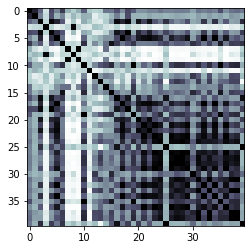

In [8]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

In [9]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright